# Scikit-Learn - Conventions

https://scikit-learn.org/stable/tutorial/basic/tutorial.html#conventions
    
Scikit-learn’s objects share a uniform basic API that consists of the following three complementary interfaces −

- Estimator interface − It is for building and fitting the models.

- Predictor interface − It is for making predictions.

- Transformer interface − It is for converting data.

The APIs adopt simple conventions and the design choices have been guided in a manner to avoid the proliferation of framework code.

## Purpose of Conventions

The purpose of conventions is to make sure that the API stick to the following broad principles −

- Consistency − All the objects whether they are basic, or composite must share a consistent interface which further composed of a limited set of methods.

- Inspection − Constructor parameters and parameters values determined by learning algorithm should be stored and exposed as public attributes.

- Non-proliferation of classes − Datasets should be represented as NumPy arrays or Scipy sparse matrix whereas hyper-parameters names and values should be represented as standard Python strings to avoid the proliferation of framework code.

- Composition − The algorithms whether they are expressible as sequences or combinations of transformations to the data or naturally viewed as meta-algorithms parameterized on other algorithms, should be implemented and composed from existing building blocks.

- Sensible defaults − In scikit-learn whenever an operation requires a user-defined parameter, an appropriate default value is defined. This default value should cause the operation to be performed in a sensible way, for example, giving a base-line solution for the task at hand.

## Various Conventions

The conventions available in Sklearn are explained below −

### Type casting

https://scikit-learn.org/stable/tutorial/basic/tutorial.html#conventions

Unless otherwise specified, input will be cast to float64:

In the following example, in which sklearn.random_projection module used to reduce the dimensionality of the data, will explain it −

### Example

In [6]:
import numpy as np
from sklearn import random_projection

rng = np.random.RandomState(0)
X = rng.rand(10,2000)
X = np.array(X, dtype = 'float32')
print('X.dtype:\n', X.dtype)
print()
transformer_data = random_projection.GaussianRandomProjection()
#X_new = transformer.fit_transform(X)
X_new = transformer_data.fit_transform(X)
print('X_new.dtype:\n', X_new.dtype)

X.dtype:
 float32

X_new.dtype:
 float64


# Note:

In this example, X is float32, which is cast to float64 by fit_transform(X).

# Target Data and Classification Targets
Regression targets are cast to float64 and classification targets are maintained:

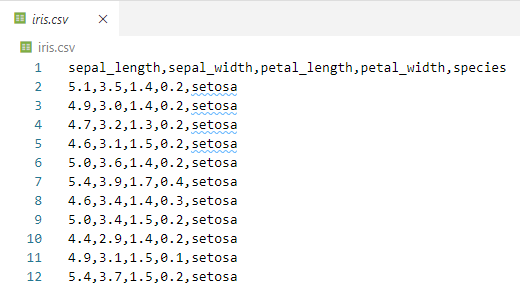

In [10]:
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC()
print('clf.fit(iris.data, iris.target):')
print(clf.fit(iris.data, iris.target))
print()
#SVC()

print('list(clf.predict(iris.data[:5])):')
print(list(clf.predict(iris.data[:5])))
print()
# Label data are integer
#[0, 0, 0, ...]
print ('iris.data[:3]:')
print (iris.data[:3])
print()
# 
print ('iris.data.dtype:')
print (iris.data.dtype)
print()
# float64

clf.fit(iris.data, iris.target_names[iris.target])
#SVC()
print('list(clf.predict(iris.data[:5])):')
print(list(clf.predict(iris.data[:5])))

clf.fit(iris.data, iris.target):
SVC()

list(clf.predict(iris.data[:5])):
[0, 0, 0, 0, 0]

iris.data[:3]:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

iris.data.dtype:
float64

list(clf.predict(iris.data[:5])):
['setosa', 'setosa', 'setosa', 'setosa', 'setosa']


### Note: 

In the above example, we can see that X is float32 which is cast to float64 by fit_transform(X).

## Refitting and Updating Parameters

Hyper-parameters of an estimator can be updated and refitted after it has been constructed via the set_params() method. 

Let’s see the following example to understand it −

### Example

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
X, y = load_iris(return_X_y = True)
print('X[:10]:\n', X[:10])
print()
print('y[:10]:\n', y[:10])
print()
clf = SVC()
clf.set_params(kernel = 'linear').fit(X, y)
print("kernel = 'linear' =>clf.predict(X[:5]):\n", clf.predict(X[:5]))

clf.set_params(kernel = 'rbf', gamma = 'scale').fit(X, y)
print("kernel = 'rbf' => clf.predict(X[:5]):\n", clf.predict(X[:5]))

X[:10]:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

y[:10]:
 [0 0 0 0 0 0 0 0 0 0]

kernel = 'linear' =>clf.predict(X[:5]):
 [0 0 0 0 0]
kernel = 'rbf' => clf.predict(X[:5]):
 [0 0 0 0 0]


## Multiclass & Multilabel fitting

In case of multiclass fitting, both learning and the prediction tasks are dependent on the format of the target data fit upon. 

The module used is sklearn.multiclass. 

Check the example below, where multiclass classifier is fit on a 1d array.

### Example

In [5]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
X = [[1, 2], [3, 4], [4, 5], [5, 2], [1, 1]]
y = [0, 0, 1, 1, 2]
classif = OneVsRestClassifier(estimator = SVC(gamma = 'scale',random_state = 0))
print('classif.fit(X, y).predict(X):\n', classif.fit(X, y).predict(X))

classif.fit(X, y).predict(X):
 [0 1 1 1 2]


In the above example, classifier is fit on one dimensional array of multiclass labels and the predict() method hence provides corresponding multiclass prediction. But on the other hand, it is also possible to fit upon a two-dimensional array of binary label indicators as follows −

### Example

In [7]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
X = [[1, 2], [3, 4], [4, 5], [5, 2], [1, 1]]
y = LabelBinarizer().fit_transform(y)
print('classif.fit(X, y).predict(X):\n', classif.fit(X, y).predict(X))

classif.fit(X, y).predict(X):
 [[0 0 0]
 [0 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 0]]


Similarly, in case of multilabel fitting, an instance can be assigned multiple labels as follows −

### Example

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
print('classif.fit(X, y).predict(X):\n', classif.fit(X, y).predict(X))

classif.fit(X, y).predict(X):
 [[1 0 1 0 0]
 [1 0 1 0 0]
 [1 0 1 1 0]
 [1 0 1 1 0]
 [1 0 1 0 0]]


In the above example, sklearn.MultiLabelBinarizer is used to binarize the two dimensional array of multilabels to fit upon. 

That is why predict() function gives a 2d array as output with multiple labels for each instance.